In [331]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns
import pandas_datareader as pdr
import datetime as dt

In [332]:
#CALLING THE DATAS 

In [357]:
start = dt.datetime(2018,6,1)
end = dt.datetime(2022,7,1)

In [358]:
data1 = pdr.get_data_yahoo("AAPL",start,end)
data2= pdr.get_data_yahoo("AMZN",start,end)
data3= pdr.get_data_yahoo("MSFT",start,end)
data4= pdr.get_data_yahoo("GOOG",start,end)

In [359]:
data1["Company"] = "Apple"
data2["Company"] = "Amazon"
data3["Company"] = "Microsoft"
data4["Company"] = "Google"

In [360]:
#MERGING THE DATAS

In [361]:
data = pd.concat([data1,data2,data3,data4])

In [338]:
data.head()

,High,Low,Open,Close,Volume,Adj Close,Company
Date,,,,,,,
2018-05-31,47.057499,46.535000,46.805000,46.717499,109931200.0,44.776775,Apple
2018-06-01,47.564999,46.937500,46.997501,47.560001,93770000.0,45.584274,Apple
2018-06-04,48.355000,47.837502,47.910000,47.957500,105064800.0,45.965271,Apple
2018-06-05,48.485001,48.090000,48.267502,48.327499,86264000.0,46.319897,Apple
2018-06-06,48.520000,47.980000,48.407501,48.494999,83734400.0,46.480438,Apple


In [339]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close,Company
Date,,,,,,,
2022-06-27,119.250000,116.000748,118.934998,116.622498,32840000.0,116.622498,Google
2022-06-28,117.856499,112.444000,116.350998,112.571503,28232000.0,112.571503,Google
2022-06-29,113.664497,111.554001,112.148499,112.256500,18628000.0,112.256500,Google
2022-06-30,111.329803,107.309998,110.499496,109.372498,38046000.0,109.372498,Google
2022-07-01,109.806351,107.105003,108.336998,109.081001,31028000.0,109.081001,Google


In [340]:
data.index

DatetimeIndex(['2018-05-31', '2018-06-01', '2018-06-04', '2018-06-05',
               '2018-06-06', '2018-06-07', '2018-06-08', '2018-06-11',
               '2018-06-12', '2018-06-13',
               ...
               '2022-06-17', '2022-06-21', '2022-06-22', '2022-06-23',
               '2022-06-24', '2022-06-27', '2022-06-28', '2022-06-29',
               '2022-06-30', '2022-07-01'],
              dtype='datetime64[ns]', name='Date', length=4120, freq=None)

In [341]:
data.dtypes

High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Adj Close    float64
Company       object
dtype: object

In [342]:
#CLEANING THE DATA

In [343]:
data.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
Company      0
dtype: int64

In [344]:
data.duplicated().sum()

0

In [345]:
companies = data["Company"].unique()
companies

array(['Apple', 'Amazon', 'Microsoft', 'Google'], dtype=object)

In [346]:
grouped = data.groupby("Company")

In [244]:
#CHANGE IN STOCK PRICE OVER TIME

<IPython.core.display.Javascript object>


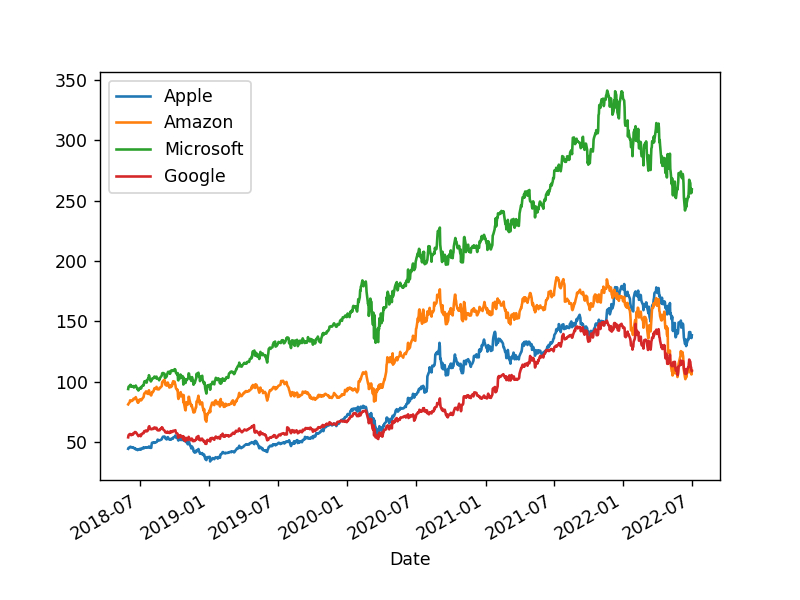

In [245]:
fig,ax = plt.subplots()
for company in companies:
    data = grouped.get_group(company)
    data["Adj Close"].plot(ax=ax,legend = True)
ax.legend(companies)

In [246]:
#CHANGE IN STOCKS VOLUME OVER TIME

<IPython.core.display.Javascript object>


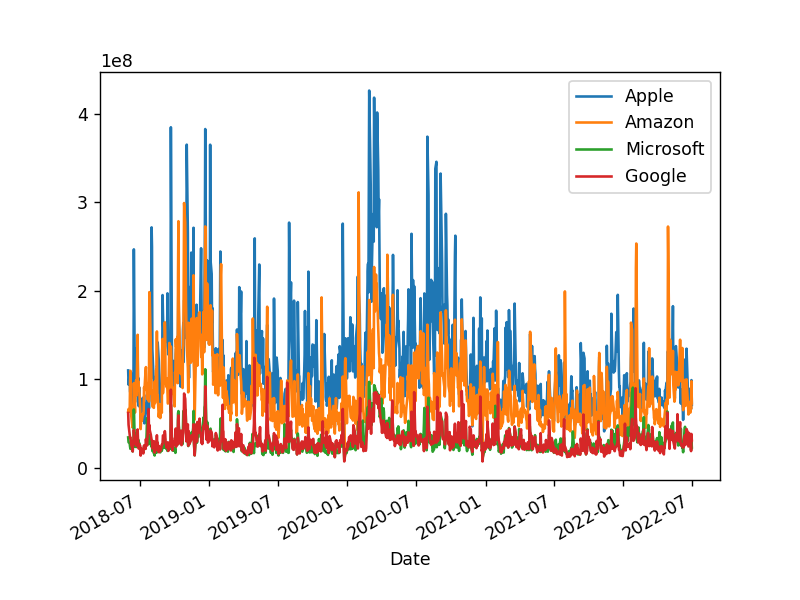

In [247]:
fig,ax = plt.subplots()
for company in companies:
    data = grouped.get_group(company)
    data["Volume"].plot(ax=ax,legend=True)
ax.legend(companies)

In [263]:
#MOVING AVERAGES FOR STOCKS

In [264]:
data["MA10"] = data["Close"].rolling(10).mean()

In [265]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close,Company,MA10
Date,,,,,,,,
2022-06-27,119.250000,116.000748,118.934998,116.622498,32840000.0,116.622498,Google,111.085651
2022-06-28,117.856499,112.444000,116.350998,112.571503,28232000.0,112.571503,Google,111.655151
2022-06-29,113.664497,111.554001,112.148499,112.256500,18628000.0,112.256500,Google,112.161401
2022-06-30,111.329803,107.309998,110.499496,109.372498,38046000.0,109.372498,Google,112.059600
2022-07-01,109.806351,107.105003,108.336998,109.081001,31028000.0,109.081001,Google,112.304100


In [266]:
data.iloc[1000]

High          141.660004
Low           136.600006
Open          139.880005
Close         137.350006
Volume       136095600.0
Adj Close     136.932343
Company            Apple
MA10             147.297
Name: 2022-05-19 00:00:00, dtype: object

In [267]:
data.iloc[2000]

High         162.199997
Low          157.254501
Open         161.650497
Close        158.755997
Volume       79056000.0
Adj Close    158.755997
Company          Amazon
MA10         165.074448
Name: 2022-04-06 00:00:00, dtype: object

In [268]:
data.iloc[3000]

High         291.700012
Low          280.100006
Open         290.179993
Close        280.269989
Volume       37811200.0
Adj Close    279.026489
Company       Microsoft
MA10            295.025
Name: 2022-02-23 00:00:00, dtype: object

In [269]:
data.iloc[4000]

High         138.639999
Low          133.140503
Open         135.098999
Close        138.574005
Volume       34096000.0
Adj Close    138.574005
Company          Google
MA10         142.390851
Name: 2022-01-10 00:00:00, dtype: object

In [270]:
#DAILY RETURN AVERAGE OF A STOCK

In [271]:
# STOCK - 1 (APPLE)

In [296]:
data1["Daily Return"] = data1["Close"]/data1["Close"].shift(1) - 1

In [297]:
data1.head()

,High,Low,Open,Close,Volume,Adj Close,Company,Daily Return
Date,,,,,,,,
2018-05-31,47.057499,46.535000,46.805000,46.717499,109931200.0,44.776775,Apple,NaN
2018-06-01,47.564999,46.937500,46.997501,47.560001,93770000.0,45.584282,Apple,0.018034
2018-06-04,48.355000,47.837502,47.910000,47.957500,105064800.0,45.965267,Apple,0.008358
2018-06-05,48.485001,48.090000,48.267502,48.327499,86264000.0,46.319893,Apple,0.007715
2018-06-06,48.520000,47.980000,48.407501,48.494999,83734400.0,46.480438,Apple,0.003466


In [298]:
data1.tail()

,High,Low,Open,Close,Volume,Adj Close,Company,Daily Return
Date,,,,,,,,
2022-06-27,143.490005,140.970001,142.699997,141.660004,70207900.0,141.229233,Apple,0.000000
2022-06-28,143.419998,137.320007,142.130005,137.440002,67083400.0,137.022064,Apple,-0.029790
2022-06-29,140.669998,136.669998,137.460007,139.229996,66242400.0,138.806610,Apple,0.013024
2022-06-30,138.369995,133.770004,137.250000,136.720001,98964500.0,136.304245,Apple,-0.018028
2022-07-01,139.039993,135.660004,136.039993,138.929993,71051600.0,138.507507,Apple,0.016164


In [299]:
data1["Daily Return"].describe()

count    1029.000000
mean        0.001288
std         0.021362
min        -0.128647
25%        -0.008612
50%         0.001423
75%         0.012698
max         0.119808
Name: Daily Return, dtype: float64

In [78]:
# STOCK - 2 (AMAZON)

In [300]:
data2["Daily Return"] = data2["Close"]/data2["Close"].shift(1) - 1

In [301]:
data2.head()

,High,Low,Open,Close,Volume,Adj Close,Company,Daily Return
Date,,,,,,,,
2018-05-31,81.750000,81.067497,81.150002,81.481003,63326000.0,81.481003,Amazon,NaN
2018-06-01,82.336502,81.754501,81.851501,82.077003,66268000.0,82.077003,Amazon,0.007315
2018-06-04,83.283997,82.274498,82.445000,83.263496,63754000.0,83.263496,Amazon,0.014456
2018-06-05,84.949997,83.502998,83.649498,84.817497,95644000.0,84.817497,Amazon,0.018664
2018-06-06,85.724998,84.323502,85.225502,84.787498,109464000.0,84.787498,Amazon,-0.000354


In [302]:
data2.tail()

,High,Low,Open,Close,Volume,Adj Close,Company,Daily Return
Date,,,,,,,,
2022-06-27,117.980003,112.699997,117.089996,113.220001,62133200.0,113.220001,Amazon,-0.027821
2022-06-28,114.849998,107.040001,113.500000,107.400002,74942900.0,107.400002,Amazon,-0.051404
2022-06-29,110.989998,106.910004,107.379997,108.919998,66375300.0,108.919998,Amazon,0.014153
2022-06-30,108.180000,102.519997,108.110001,106.209999,97679400.0,106.209999,Amazon,-0.024881
2022-07-01,109.750000,105.849998,106.290001,109.559998,73021200.0,109.559998,Amazon,0.031541


In [303]:
data2["Daily Return"].describe()

count    1029.000000
mean        0.000528
std         0.021914
min        -0.140494
25%        -0.009969
50%         0.001175
75%         0.011145
max         0.135359
Name: Daily Return, dtype: float64

In [83]:
# STOCK - 3 (MICROSOFT)

In [304]:
data3["Daily Return"] = data3["Close"].pct_change()

In [305]:
data3.head()

,High,Low,Open,Close,Volume,Adj Close,Company,Daily Return
Date,,,,,,,,
2018-05-31,99.989998,98.610001,99.290001,98.839996,34140900.0,94.186340,Microsoft,NaN
2018-06-01,100.860001,99.169998,99.279999,100.790001,28655600.0,96.044556,Microsoft,0.019729
2018-06-04,101.860001,100.849998,101.260002,101.669998,27281600.0,96.883110,Microsoft,0.008731
2018-06-05,102.330002,101.529999,102.000000,102.190002,23514400.0,97.378624,Microsoft,0.005115
2018-06-06,102.599998,101.900002,102.480003,102.489998,21122900.0,97.664520,Microsoft,0.002936


In [306]:
data3.tail()

,High,Low,Open,Close,Volume,Adj Close,Company,Daily Return
Date,,,,,,,,
2022-06-27,268.299988,263.279999,268.209991,264.890015,24615100.0,264.328949,Microsoft,-0.010497
2022-06-28,266.910004,256.320007,263.980011,256.480011,27295500.0,255.936752,Microsoft,-0.031749
2022-06-29,261.970001,255.759995,257.589996,260.260010,20069800.0,259.708740,Microsoft,0.014738
2022-06-30,259.529999,252.899994,257.049988,256.829987,31730900.0,256.285980,Microsoft,-0.013179
2022-07-01,259.769989,254.610001,256.390015,259.579987,22837700.0,259.030182,Microsoft,0.010707


In [307]:
data3["Daily Return"].describe()

count    1029.000000
mean        0.001127
std         0.019376
min        -0.147390
25%        -0.007808
50%         0.001370
75%         0.010842
max         0.142169
Name: Daily Return, dtype: float64

In [88]:
# STOCK - 4 (GOOGLE)

In [308]:
data4["Daily Return"] = data4["Close"].pct_change()

In [309]:
data4.head()

,High,Low,Open,Close,Volume,Adj Close,Company,Daily Return
Date,,,,,,,,
2018-05-31,54.859501,53.377998,53.377998,54.249500,61766000,54.249500,Google,NaN
2018-06-01,56.000000,54.924999,54.967499,55.974998,48432000,55.974998,Google,0.031807
2018-06-04,57.094501,56.100250,56.116501,56.964500,37792000,56.964500,Google,0.017678
2018-06-05,57.286900,56.659500,57.049500,56.983002,33560000,56.983002,Google,0.000325
2018-06-06,57.150002,56.287151,57.108501,56.844002,33964000,56.844002,Google,-0.002439


In [310]:
data4.tail()

,High,Low,Open,Close,Volume,Adj Close,Company,Daily Return
Date,,,,,,,,
2022-06-27,119.250000,116.000748,118.934998,116.622498,32840000,116.622498,Google,-0.016159
2022-06-28,117.856499,112.444000,116.350998,112.571503,28232000,112.571503,Google,-0.034736
2022-06-29,113.664497,111.554001,112.148499,112.256500,18628000,112.256500,Google,-0.002798
2022-06-30,111.329803,107.309998,110.499496,109.372498,38046000,109.372498,Google,-0.025691
2022-07-01,109.806351,107.105003,108.336998,109.081001,31028000,109.081001,Google,-0.002665


In [311]:
data4["Daily Return"].describe()

count    1029.000000
mean        0.000863
std         0.019170
min        -0.111008
25%        -0.007329
50%         0.001335
75%         0.010417
max         0.104485
Name: Daily Return, dtype: float64

In [ ]:
# TREND OF ALL STOCKS (DAILY RETURN)

In [362]:
data["Trend"] = data["Close"].pct_change()

In [313]:
data.head()

,High,Low,Open,Close,Volume,Adj Close,Company,Trend
Date,,,,,,,,
2018-05-31,47.057499,46.535000,46.805000,46.717499,109931200.0,44.776775,Apple,NaN
2018-06-01,47.564999,46.937500,46.997501,47.560001,93770000.0,45.584282,Apple,0.018034
2018-06-04,48.355000,47.837502,47.910000,47.957500,105064800.0,45.965267,Apple,0.008358
2018-06-05,48.485001,48.090000,48.267502,48.327499,86264000.0,46.319893,Apple,0.007715
2018-06-06,48.520000,47.980000,48.407501,48.494999,83734400.0,46.480438,Apple,0.003466


In [314]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close,Company,Trend
Date,,,,,,,,
2022-06-27,119.250000,116.000748,118.934998,116.622498,32840000.0,116.622498,Google,-0.016159
2022-06-28,117.856499,112.444000,116.350998,112.571503,28232000.0,112.571503,Google,-0.034736
2022-06-29,113.664497,111.554001,112.148499,112.256500,18628000.0,112.256500,Google,-0.002798
2022-06-30,111.329803,107.309998,110.499496,109.372498,38046000.0,109.372498,Google,-0.025691
2022-07-01,109.806351,107.105003,108.336998,109.081001,31028000.0,109.081001,Google,-0.002665


In [315]:
data.iloc[1000]

High          141.660004
Low           136.600006
Open          139.880005
Close         137.350006
Volume       136095600.0
Adj Close     136.932343
Company            Apple
Trend          -0.024641
Name: 2022-05-19 00:00:00, dtype: object

In [316]:
data.iloc[2000]

High         162.199997
Low          157.254501
Open         161.650497
Close        158.755997
Volume       79056000.0
Adj Close    158.755997
Company          Amazon
Trend           -0.0323
Name: 2022-04-06 00:00:00, dtype: object

In [317]:
data.iloc[3000]

High         291.700012
Low          280.100006
Open         290.179993
Close        280.269989
Volume       37811200.0
Adj Close    279.026489
Company       Microsoft
Trend         -0.025893
Name: 2022-02-23 00:00:00, dtype: object

In [318]:
data.iloc[4000]

High         138.639999
Low          133.140503
Open         135.098999
Close        138.574005
Volume       34096000.0
Adj Close    138.574005
Company          Google
Trend          0.011456
Name: 2022-01-10 00:00:00, dtype: object

In [353]:
# TREND FREQUENCY

<IPython.core.display.Javascript object>


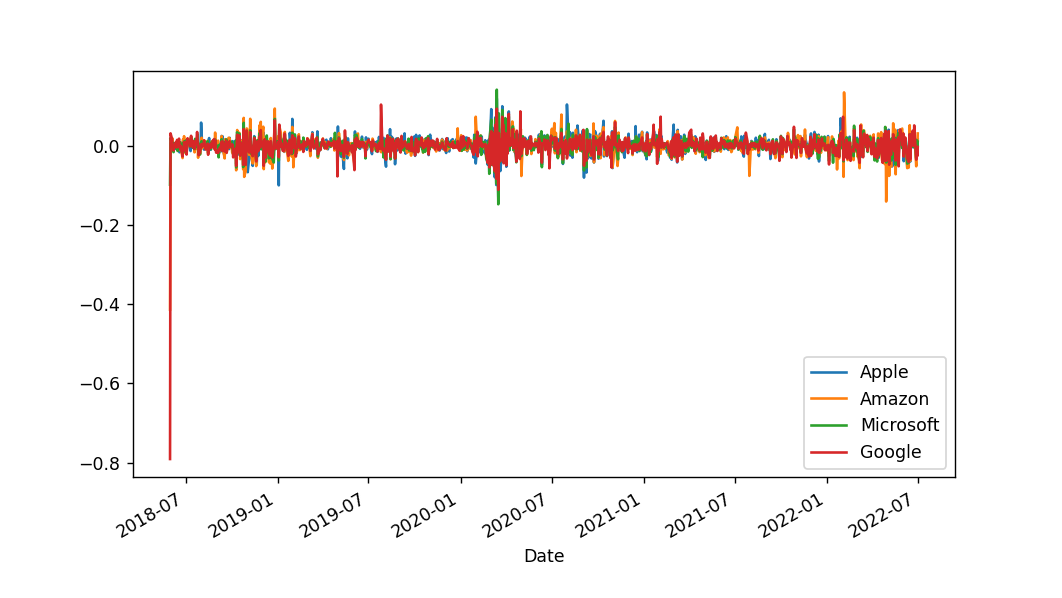

In [352]:
fig,ax = plt.subplots()
for company in companies:
    data = grouped.get_group(company)
    data["Trend"].plot.line(ax=ax,legend=True)
ax.legend(companies)

In [354]:
# TREND FREQUENCY THROUGH A PIE CHART

In [365]:
Trend = data.groupby("Company").mean()
Trend

,High,Low,Open,Close,Volume,Adj Close,Trend
Company,,,,,,,
Amazon,126.840232,123.764934,125.388138,125.304956,8.643349e+07,125.304956,0.000126
Apple,98.281736,95.993085,97.116952,97.182888,1.190962e+08,95.847238,0.001288
Google,87.904228,86.058376,86.960785,86.995492,3.106921e+07,86.995492,0.000094
Microsoft,198.836029,194.664951,196.821728,196.851738,3.049125e+07,192.872328,0.001031


<IPython.core.display.Javascript object>


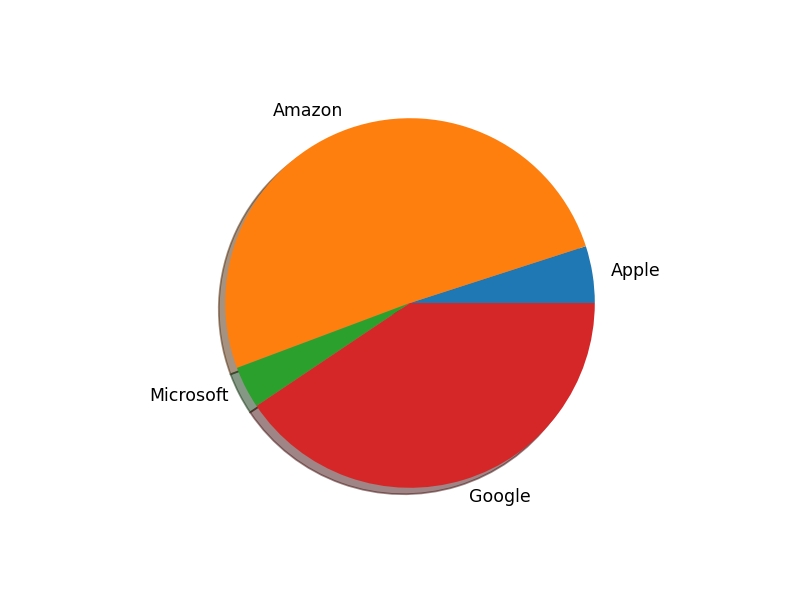

([<matplotlib.patches.Wedge at 0x1aa5435f520>,
 [Text(1.086588175406304, 0.17124875785593063, 'Apple'),
  Text(-0.3624379814553338, 1.038575326877441, 'Amazon'),
  Text(-0.978236778595371, -0.5030435418563203, 'Microsoft'),
  Text(0.3203659931792974, -1.0523144161391322, 'Google')])

In [373]:
plt.pie(Trend["Trend"],labels=companies,shadow=True)